C:\Users\sharan\AppData\Local\Temp\ipykernel_36948\3318204313.py:26: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
C:\Users\sharan\AppData\Local\Temp\ipykernel_36948\3318204313.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="total_amount", y="state", data=top_states_trans, palette="viridis")


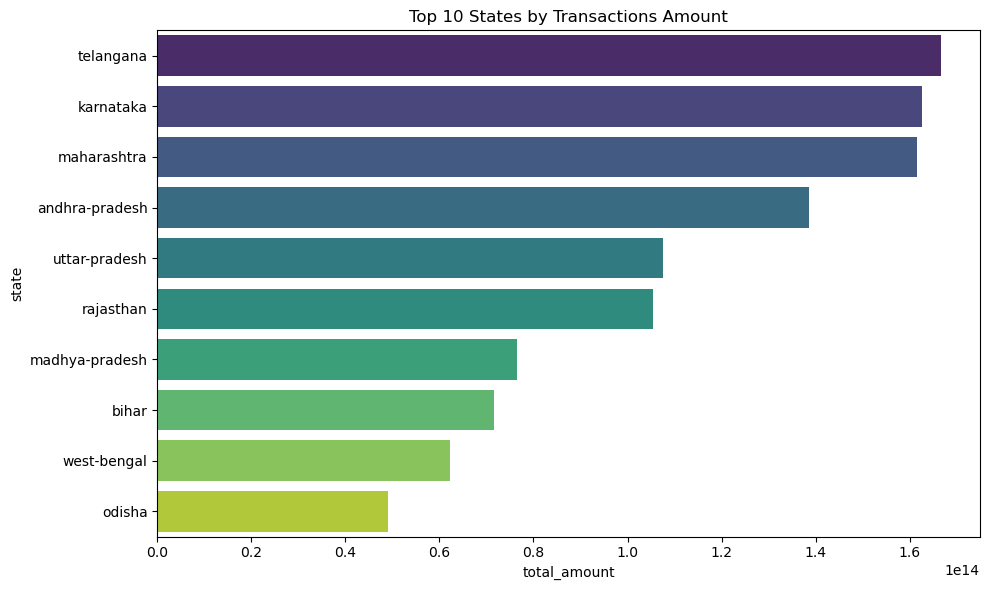

C:\Users\sharan\AppData\Local\Temp\ipykernel_36948\3318204313.py:26: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
C:\Users\sharan\AppData\Local\Temp\ipykernel_36948\3318204313.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="total_users", y="state", data=top_states_users, palette="magma")


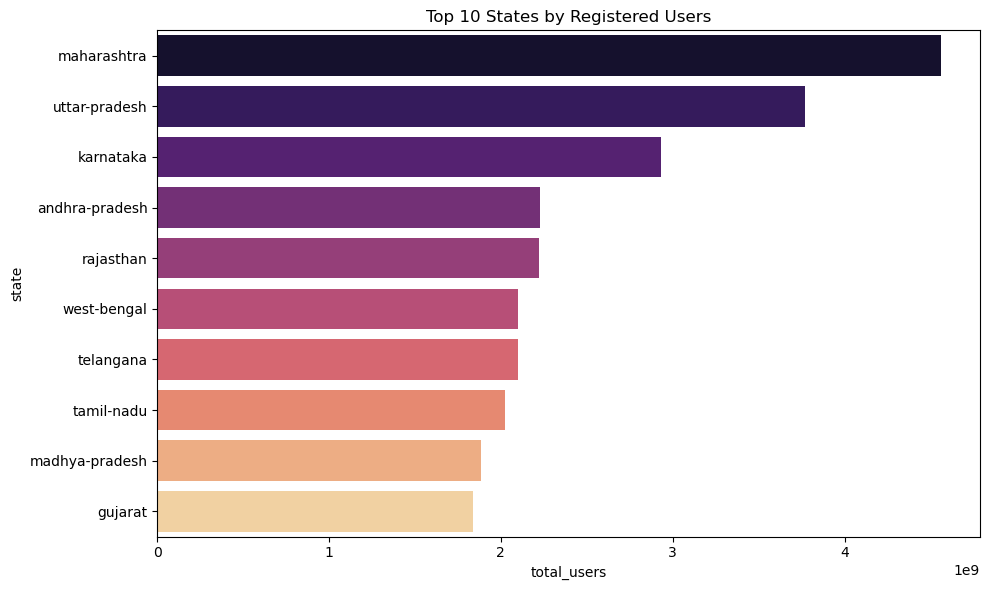

C:\Users\sharan\AppData\Local\Temp\ipykernel_36948\3318204313.py:26: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


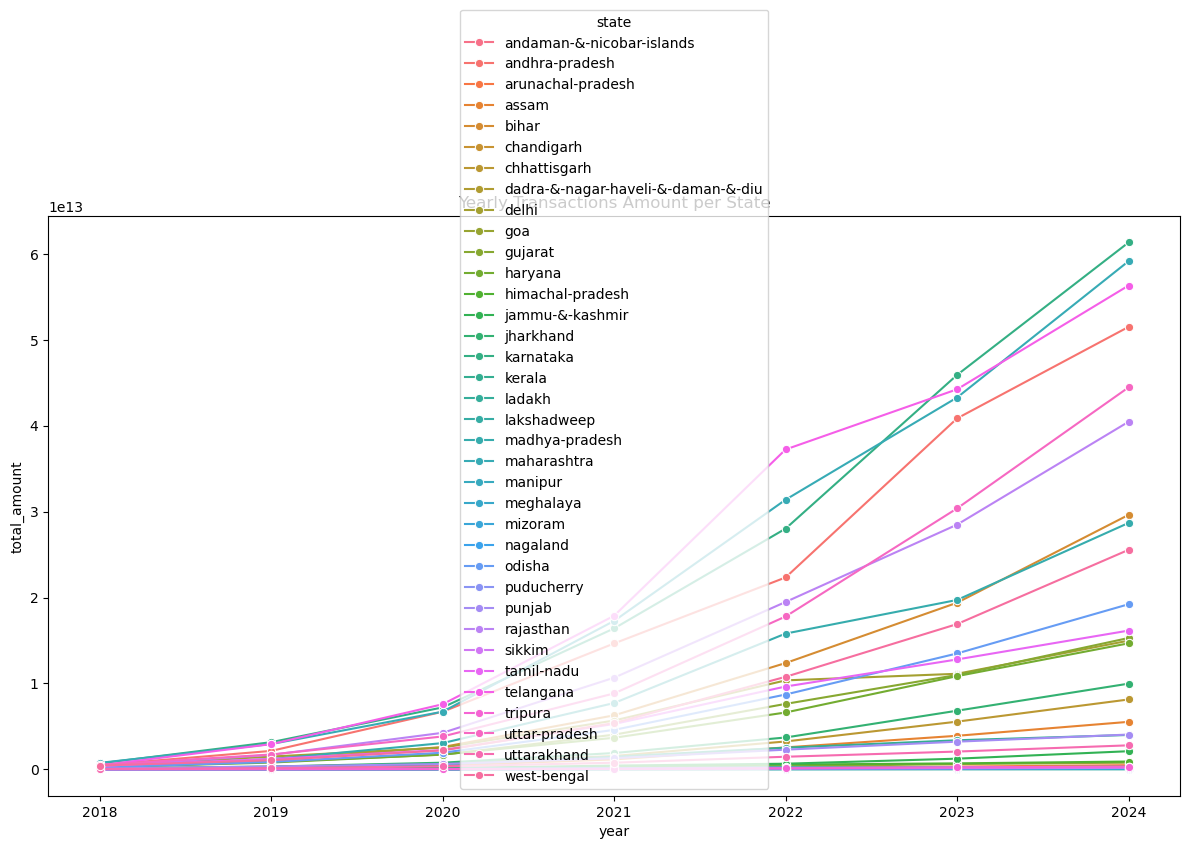

C:\Users\sharan\AppData\Local\Temp\ipykernel_36948\3318204313.py:26: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


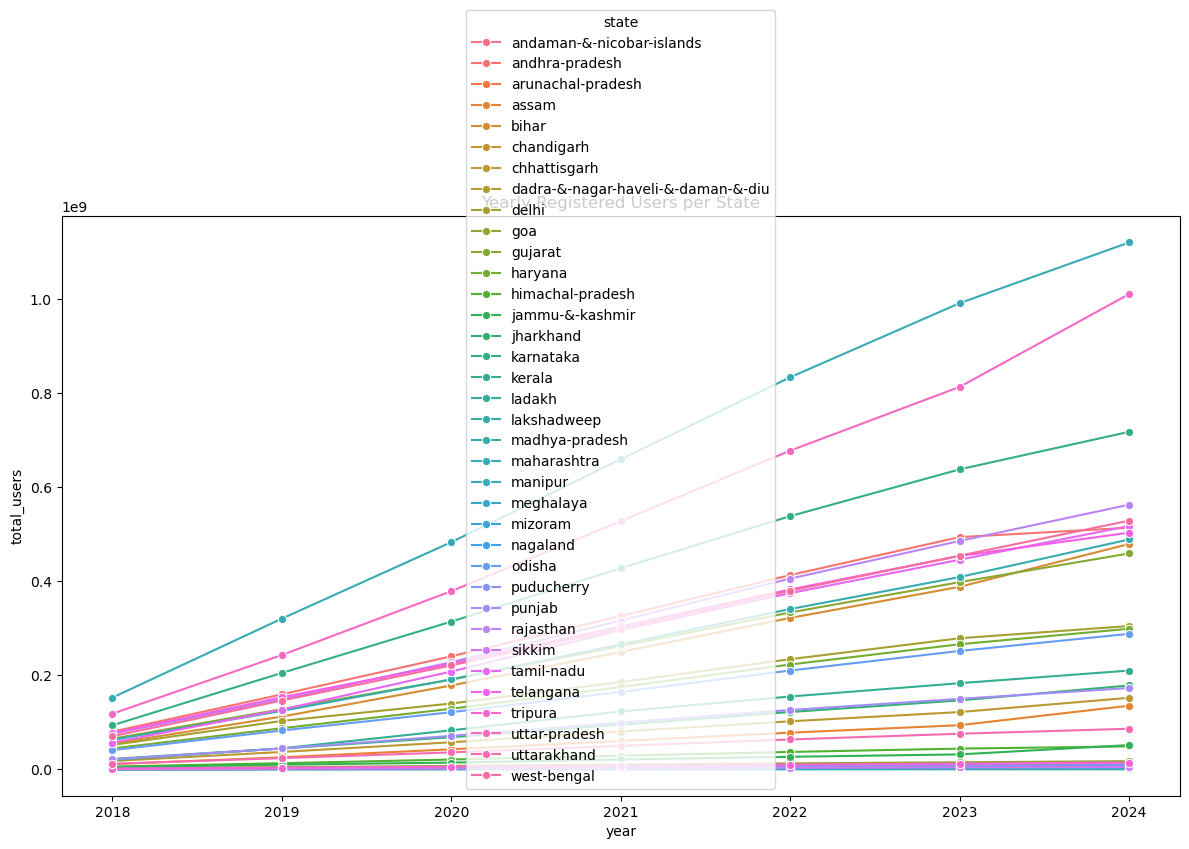

C:\Users\sharan\AppData\Local\Temp\ipykernel_36948\3318204313.py:26: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
C:\Users\sharan\AppData\Local\Temp\ipykernel_36948\3318204313.py:120: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="total_amount", y="district", data=top_districts_trans, palette="cubehelix")


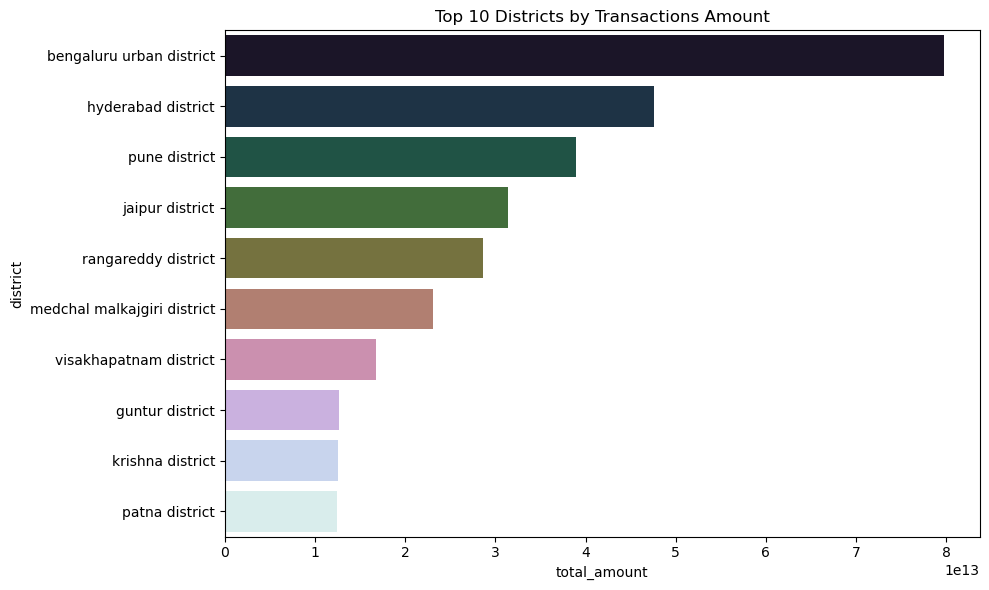

C:\Users\sharan\AppData\Local\Temp\ipykernel_36948\3318204313.py:26: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
C:\Users\sharan\AppData\Local\Temp\ipykernel_36948\3318204313.py:140: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="total_users", y="district", data=top_districts_users, palette="cubehelix")


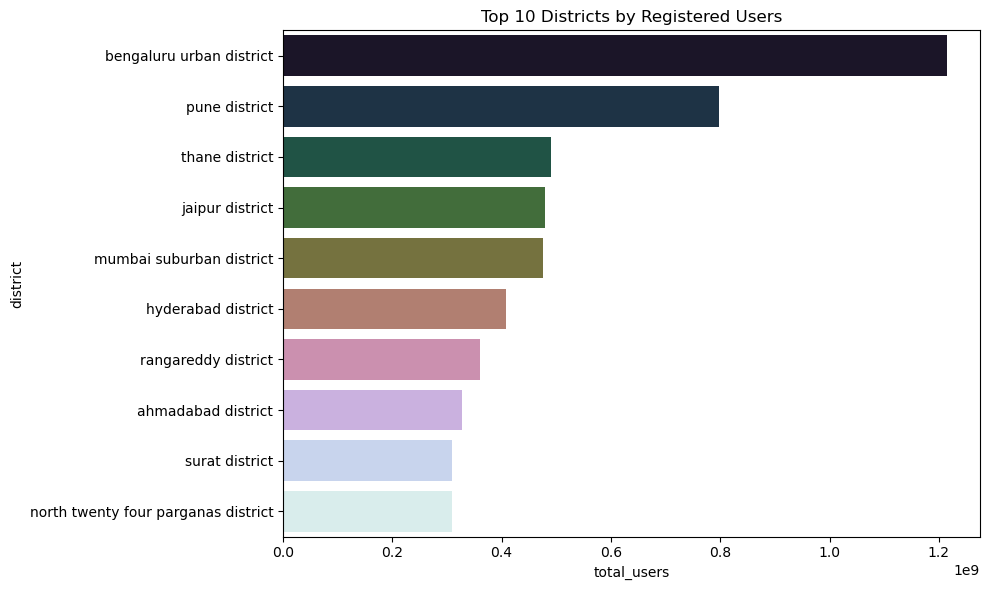

✅ SQL analysis completed. Graphs saved in: C:\Users\sharan\Documents\phonepe_insights\graphs


In [1]:
# -------------------------------
# SQL Analysis on PhonePe Insights
# -------------------------------

import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# --- MySQL Connection ---
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="1234",
    database="phonepe_insights"
)
cursor = conn.cursor()

# --- Graph folder ---
graph_folder = r"C:\Users\sharan\Documents\phonepe_insights\graphs"
os.makedirs(graph_folder, exist_ok=True)

# --- Utility function to run query and return dataframe ---
def run_query(query):
    df = pd.read_sql(query, conn)
    return df

# =====================
# 1. Top 10 States by Transactions Amount (aggregated)
# =====================
query = """
SELECT state, SUM(amount) AS total_amount
FROM aggregated_transaction
GROUP BY state
ORDER BY total_amount DESC
LIMIT 10;
"""
top_states_trans = run_query(query)

plt.figure(figsize=(10,6))
sns.barplot(x="total_amount", y="state", data=top_states_trans, palette="viridis")
plt.title("Top 10 States by Transactions Amount")
plt.tight_layout()
plt.savefig(os.path.join(graph_folder, "top10_states_transactions.png"), bbox_inches="tight")
plt.show()
plt.close()

# =====================
# 2. Top 10 States by Registered Users (aggregated)
# =====================
query = """
SELECT state, SUM(registered_users) AS total_users
FROM aggregated_user
GROUP BY state
ORDER BY total_users DESC
LIMIT 10;
"""
top_states_users = run_query(query)

plt.figure(figsize=(10,6))
sns.barplot(x="total_users", y="state", data=top_states_users, palette="magma")
plt.title("Top 10 States by Registered Users")
plt.tight_layout()
plt.savefig(os.path.join(graph_folder, "top10_states_users.png"), bbox_inches="tight")
plt.show()
plt.close()

# =====================
# 3. Yearly Transactions Amount per State
# =====================
query = """
SELECT state, year, SUM(amount) AS total_amount
FROM aggregated_transaction
GROUP BY state, year
ORDER BY state, year;
"""
yearly_trans = run_query(query)

plt.figure(figsize=(12,8))
sns.lineplot(x="year", y="total_amount", hue="state", data=yearly_trans, marker="o")
plt.title("Yearly Transactions Amount per State")
plt.tight_layout()
plt.savefig(os.path.join(graph_folder, "yearly_transactions_state.png"), bbox_inches="tight")
plt.show()
plt.close()

# =====================
# 4. Yearly Registered Users per State
# =====================
query = """
SELECT state, year, SUM(registered_users) AS total_users
FROM aggregated_user
GROUP BY state, year
ORDER BY state, year;
"""
yearly_users = run_query(query)

plt.figure(figsize=(12,8))
sns.lineplot(x="year", y="total_users", hue="state", data=yearly_users, marker="o")
plt.title("Yearly Registered Users per State")
plt.tight_layout()
plt.savefig(os.path.join(graph_folder, "yearly_users_state.png"), bbox_inches="tight")
plt.show()
plt.close()

# =====================
# 5. Top 10 Districts by Transactions Amount
# =====================
query = """
SELECT district, SUM(amount) AS total_amount
FROM map_transaction
GROUP BY district
ORDER BY total_amount DESC
LIMIT 10;
"""
top_districts_trans = run_query(query)

plt.figure(figsize=(10,6))
sns.barplot(x="total_amount", y="district", data=top_districts_trans, palette="cubehelix")
plt.title("Top 10 Districts by Transactions Amount")
plt.tight_layout()
plt.savefig(os.path.join(graph_folder, "top10_districts_transactions.png"), bbox_inches="tight")
plt.show()
plt.close()

# =====================
# 6. Top 10 Districts by Registered Users
# =====================
query = """
SELECT district, SUM(registered_users) AS total_users
FROM map_user
GROUP BY district
ORDER BY total_users DESC
LIMIT 10;
"""
top_districts_users = run_query(query)

plt.figure(figsize=(10,6))
sns.barplot(x="total_users", y="district", data=top_districts_users, palette="cubehelix")
plt.title("Top 10 Districts by Registered Users")
plt.tight_layout()
plt.savefig(os.path.join(graph_folder, "top10_districts_users.png"), bbox_inches="tight")
plt.show()
plt.close()

# -------------------------------
# Close connection
# -------------------------------
cursor.close()
conn.close()
print("✅ SQL analysis completed. Graphs saved in:", graph_folder)
